# Single cell analysis of P2 mouse retinal  cells using Seurat   
Here, I show the basic pipleline to analyse single cell data.   

This analysis contains downsampling, standard preprocessing, dimensional reduction, clustering, and identification of cell types.   

To see more detail in data source, please refer to the reference below.   
Clark BS. Neuron. 2019 Jun 19;102(6):1111-1126.e5.

# Data load
To obtain data, refer to the folloing URL.   
https://github.com/gofflab/developing_mouse_retina_scRNASeq

In [10]:
#Load the library
library(Matrix)
library(dplyr)
library(Seurat)

In [54]:
#Load the expression matrix
dat_count <- readMM("10x_mouse_retina_development.mtx")
#Load the each coordinate of cells in three dimensional UMAP space
dat_phenotype <- read.csv("10x_mouse_retina_development_phenotype.csv", header=T, row.names=1, stringsAsFactors=F)
#Load the annotation file
dat_feature <- read.csv("10x_mouse_retina_development_feature.csv", header=T, stringsAsFactors=F, row.names=1)

In [55]:
#Check the data dimensions
dim(dat_count)
dim(dat_phenotype)
dim(dat_feature)

[1]  27998 107052

[1] 107052    100

[1] 27998     7

In [20]:
#Show the subset of the data
head(dat_count)

6 x 107052 sparse Matrix of class "dgTMatrix"
                                                                               
[1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[6,] . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . ......

 .....suppressing columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [21]:
#Show the subset of the data
head(dat_phenotype)

,barcode,sample,age,Size_Factor,num_genes_expressed,Total_mRNAs,CellType,raw_cluster,new_CellType,largeVis1,⋯,Patt.71,Patt.72,Patt.73,Patt.74,Patt.75,Patt.76,Patt.77,Patt.78,Patt.79,Patt.80
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E11.AAACCTGAGATGTAAC.1,E11.AAACCTGAGATGTAAC-1,E11,E11,1.733369,1549,2794,RPCs,32,Early RPCs,2.2338175,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
E11.AAACCTGAGGCAATTA.1,E11.AAACCTGAGGCAATTA-1,E11,E11,2.201143,1848,3548,RPCs,9,Early RPCs,-0.6808101,⋯,1.008011,21.921519,16.938427,1.000011,1.000180,60.656578,1.002151,37.660817,1.000047,1.000198
E11.AAACCTGAGTAGCGGT.1,E11.AAACCTGAGTAGCGGT-1,E11,E11,2.381057,1935,3838,RPCs,24,RPE/Margin/Periocular Mesenchyme/Lens Epithelial Cells,1.6031758,⋯,250.307592,1.004293,1.000764,1.002577,1.000022,1.000262,1.000022,1.170338,1.001827,1.000559
E11.AAACCTGAGTGGAGTC.1,E11.AAACCTGAGTGGAGTC-1,E11,E11,2.861238,2139,4612,RPCs,9,Early RPCs,-0.7359965,⋯,1.016430,50.007646,1.011516,1.002841,1.000161,41.925894,1.001989,8.626739,1.021516,1.001392
E11.AAACCTGCAAGTTGTC.1,E11.AAACCTGCAAGTTGTC-1,E11,E11,2.044805,1723,3296,Lens Epithelia,74,RPE/Margin/Periocular Mesenchyme/Lens Epithelial Cells,2.7458238,⋯,1.000668,19.482778,1.000139,1.018392,1.000059,1.000044,1.010160,1.000184,1.000493,3.845403
E11.AAACCTGCACCCATTC.1,E11.AAACCTGCACCCATTC-1,E11,E11,2.280553,1806,3676,RPCs,32,Early RPCs,1.9579134,⋯,1.000071,1.211624,1.006995,1.000126,1.000037,1.001017,1.003272,248.890062,1.000286,1.000414


In [56]:
#Show the subset of the data
head(dat_feature)

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000051951,ENSMUSG00000051951,Xkr4,253,2.119135e-03,0.046522355,481.95455,0.209430151
ENSMUSG00000089699,ENSMUSG00000089699,Gm1992,4,3.311149e-05,0.005754187,30200.24999,0.003311149
ENSMUSG00000102343,ENSMUSG00000102343,Gm37381,58,4.801166e-04,0.021906392,2081.84482,0.048011655
ENSMUSG00000025900,ENSMUSG00000025900,Rp1,11816,1.694811e-01,0.635347014,14.05333,9.781133075
ENSMUSG00000109048,ENSMUSG00000109048,Rp1,0,0.000000e+00,0.000000000,NA,0.000000000
ENSMUSG00000025902,ENSMUSG00000025902,Sox17,108,1.622463e-03,0.077612551,2288.30757,0.089401013


# Create Seurat class object and subsampling
Below procedure requires a lots of memory, so I partially performed analysis in a HPC cluster

In [ ]:
#Creat Seurat class object
colnames(dat_count) <- rownames(dat_phenotype)
rownames(dat_count) <- rownames(dat_feature)
dat <- CreateSeuratObject(counts = dat_count, project = "Clark_P2_Retina", meta.data = dat_phenotype)

In [30]:
#Select only cells from P2 retina
dat <- subset(dat, subset = (age=="P2"))

[1] "dat_count"     "dat_feature"   "dat_phenotype" "data_feature"

In [ ]:
#Save dat object in RDS format
 saveRDS(dat, file="Clark_P2_Retina.rds")

From here, we go back to local laptop environment   
In order to perform this tutorial, you can start from here because you can handle the down sized sample

In [57]:
#Load the library
library(Matrix)
library(Seurat)

#Load dat object
dat <- readRDS(file = "Clark_P2_Retina.rds")

In [58]:
#Dimension of the down-sampled data
dim(dat)

[1] 27998 15582

In [59]:
#Structure of dat object
str(dat)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 7 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:18425089] 16 26 62 63 70 150 152 179 181 212 ...
  .. .. .. .. .. ..@ p       : int [1:15583] 0 1144 2376 3256 4695 6018 7240 8903 10089 11395 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 27998 15582
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:27998] "ENSMUSG00000051951" "ENSMUSG00000089699" "ENSMUSG00000102343" "ENSMUSG00000025900" ...
  .. .. .. .. .. .. ..$ : chr [1:15582] "P2_rep2.AAACCTGAGATAGGAG.1" "P2_rep2.AAACCTGAGCATCATC.1" "P2_rep2.AAACCTGAGCCTATGT.1" "P2_rep2.AAACCTGAGCTAGCCC.1" ...
  .. .. .. .. .. ..@ x       : num [1:18425089] 1 3 5 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  

# QC and selecting cells for further analysis

### Caliculate the percentage of reads that map to the mitochondrial genome

I am using gene IDs as row names of expression dataset.   
Here, I extract gene IDs of mitochondrial genes.

In [60]:
#Load the annotation file
dat_feature <- read.csv("10x_mouse_retina_development_feature.csv", header=T, stringsAsFactors=F, row.names=1)

In [61]:
head(dat_feature)

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000051951,ENSMUSG00000051951,Xkr4,253,2.119135e-03,0.046522355,481.95455,0.209430151
ENSMUSG00000089699,ENSMUSG00000089699,Gm1992,4,3.311149e-05,0.005754187,30200.24999,0.003311149
ENSMUSG00000102343,ENSMUSG00000102343,Gm37381,58,4.801166e-04,0.021906392,2081.84482,0.048011655
ENSMUSG00000025900,ENSMUSG00000025900,Rp1,11816,1.694811e-01,0.635347014,14.05333,9.781133075
ENSMUSG00000109048,ENSMUSG00000109048,Rp1,0,0.000000e+00,0.000000000,NA,0.000000000
ENSMUSG00000025902,ENSMUSG00000025902,Sox17,108,1.622463e-03,0.077612551,2288.30757,0.089401013


In [62]:
attach(dat_feature)

The following objects are masked from dat_feature (pos = 3):

    bcv, gene_short_name, id, mean_expr, num_cells_expressed,
    percent_detection, sd_exprs


The following objects are masked from dat_feature (pos = 4):

    bcv, gene_short_name, id, mean_expr, num_cells_expressed,
    percent_detection, sd_exprs


The following objects are masked from dat_feature (pos = 5):

    bcv, gene_short_name, id, mean_expr, num_cells_expressed,
    percent_detection, sd_exprs


The following objects are masked from dat_feature (pos = 6):

    bcv, gene_short_name, id, mean_expr, num_cells_expressed,
    percent_detection, sd_exprs


The following objects are masked from dat_feature (pos = 7):

    bcv, gene_short_name, id, mean_expr, num_cells_expressed,
    percent_detection, sd_exprs


The following objects are masked from dat_feature (pos = 8):

    bcv, gene_short_name, id, mean_expr, num_cells_expressed,
    percent_detection, sd_exprs




In [63]:
grep("^mt-", gene_short_name)

[1] 27909 27910 27911 27912 27913 27914 27915 27916 27917 27918 27919 27920
[13] 27921

In [64]:
mt_genes_id <- id[grep("^mt-", gene_short_name)]
mt_genes_id

[1] "ENSMUSG00000064341" "ENSMUSG00000064345" "ENSMUSG00000064351"
 [4] "ENSMUSG00000064354" "ENSMUSG00000064356" "ENSMUSG00000064357"
 [7] "ENSMUSG00000064358" "ENSMUSG00000064360" "ENSMUSG00000065947"
[10] "ENSMUSG00000064363" "ENSMUSG00000064367" "ENSMUSG00000064368"
[13] "ENSMUSG00000064370"

In [65]:
dat_feature[mt_genes_id,]

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000064341,ENSMUSG00000064341,mt-Nd1,116133,1.115882e+01,10.20376284,8.361501e-01,96.133406179
ENSMUSG00000064345,ENSMUSG00000064345,mt-Nd2,87817,2.112289e+00,2.54173510,1.447951e+00,72.693784974
ENSMUSG00000064351,ENSMUSG00000064351,mt-Co1,57339,8.231433e-01,1.23076563,2.235630e+00,47.464487931
ENSMUSG00000064354,ENSMUSG00000064354,mt-Co2,2441,2.066157e-02,0.14688724,5.054074e+01,2.020628456
ENSMUSG00000064356,ENSMUSG00000064356,mt-Atp8,5,4.138936e-05,0.00643335,2.416000e+04,0.004138936
ENSMUSG00000064357,ENSMUSG00000064357,mt-Atp6,4438,3.913778e-02,0.20916155,2.856087e+01,3.673719413
ENSMUSG00000064358,ENSMUSG00000064358,mt-Co3,4504,3.957650e-02,0.20862317,2.778755e+01,3.728353366
ENSMUSG00000064360,ENSMUSG00000064360,mt-Nd3,74,6.208404e-04,0.02523917,1.652686e+03,0.061256250
ENSMUSG00000065947,ENSMUSG00000065947,mt-Nd4l,0,0.000000e+00,0.00000000,NA,0.000000000


In [68]:
# Caliculate the percentage of reads that map to the mitochondrial genome
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
dat[["percent.mt"]] <- PercentageFeatureSet(dat, features = mt_genes_id)

In [72]:
# Show QC metrics for the first 5 cells
dat@meta.data[1:5, c("nFeature_RNA", "nCount_RNA", "percent.mt")]

,nFeature_RNA,nCount_RNA,percent.mt
,<int>,<dbl>,<dbl>
P2_rep2.AAACCTGAGATAGGAG.1,1144,1771,2.258611
P2_rep2.AAACCTGAGCATCATC.1,1232,2061,1.552644
P2_rep2.AAACCTGAGCCTATGT.1,880,1563,1.279591
P2_rep2.AAACCTGAGCTAGCCC.1,1439,2424,1.856436
P2_rep2.AAACCTGAGGTACTCT.1,1323,2204,1.860254


## Filtering cells based on QC metrics

In [74]:
# Summarize the QC metrics
summary(dat@meta.data[1:5, c("nFeature_RNA", "nCount_RNA", "percent.mt")])

  nFeature_RNA    nCount_RNA     percent.mt   
 Min.   : 880   Min.   :1563   Min.   :1.280  
 1st Qu.:1144   1st Qu.:1771   1st Qu.:1.553  
 Median :1232   Median :2061   Median :1.856  
 Mean   :1204   Mean   :2005   Mean   :1.762  
 3rd Qu.:1323   3rd Qu.:2204   3rd Qu.:1.860  
 Max.   :1439   Max.   :2424   Max.   :2.259  

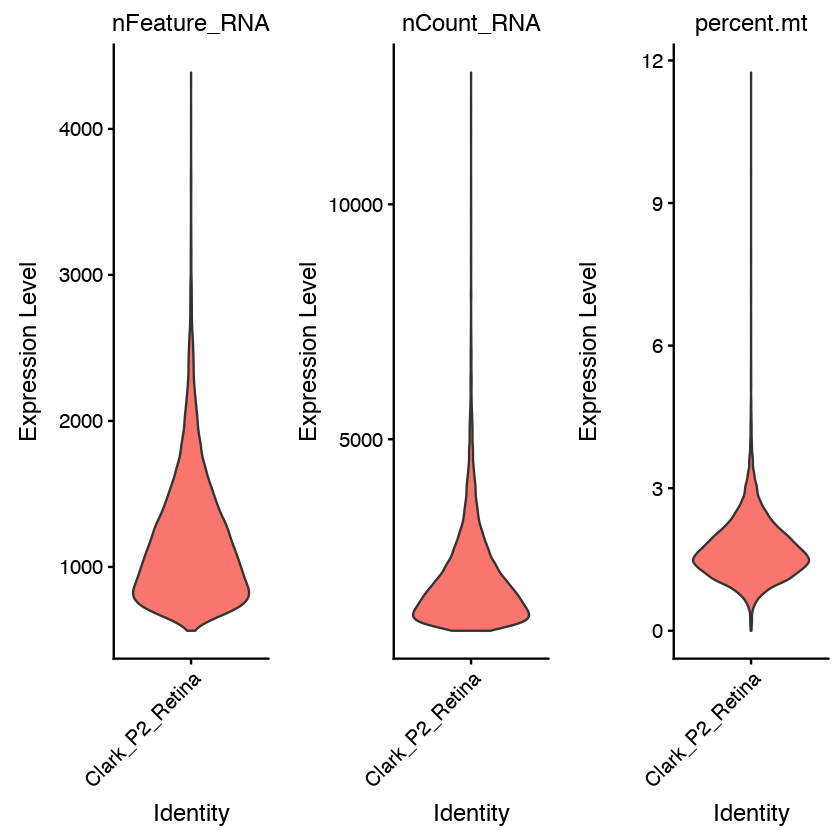

In [79]:
# Visualize QC metrics as a violin plot
VlnPlot(dat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size=FALSE)

In [76]:
?VlnPlot